In [31]:
# Group 5
# Neel Gandhi, Sunishka Jain, Daniel Shen, Julian Wu

# Imports
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
# Import data

# file = './clinvar_conflicting.csv'
file = './processedData.csv'
data = pd.read_csv(file)

In [33]:
import numpy as np

from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import xgboost as xgb

In [34]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [35]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [36]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [37]:
convert_feature = ['cDNA_position','CDS_position','Protein_position']
data['cDNA_position'] = data['cDNA_position'].astype(str).str.replace(r'\D+', '')
data['CDS_position'] = data['CDS_position'].astype(str).str.replace(r'\D+', '')
data['Protein_position'] = data['Protein_position'].astype(str).str.replace(r'\D+', '')
for i in range(len(convert_feature)):
  data[convert_feature[i]] = data[convert_feature[i]].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [38]:
cancer = data

X = data.drop(columns=['CLASS'])
y = data['CLASS']

In [39]:
from sklearn.model_selection import train_test_split
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

[[11018   410]
 [ 3184   613]]


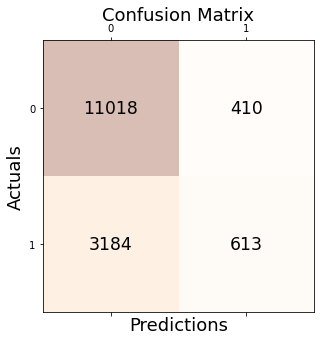

Accuracy: 0.764
Precision: 0.599
Recall: 0.161
F1 Score: 0.254
True Positives: 613
True Negatives: 11018
False Positives: 410
False Negatives: 3184
--------------------------------------------------
Accuracy: 0.76
Mis-Classification: 0.24
Sensitivity: 0.16
Specificity: 0.96
Precision: 0.96
f_1 Score: 0.28


In [40]:


xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))


confusion_metrics(conf_matrix)

[[11428     0]
 [ 3797     0]]


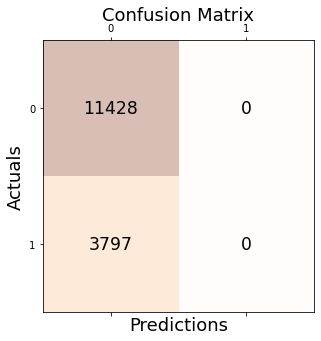

Accuracy: 0.751
Precision: 0.000
Recall: 0.000
F1 Score: 0.000
True Positives: 0
True Negatives: 11428
False Positives: 0
False Negatives: 3797
--------------------------------------------------
Accuracy: 0.75
Mis-Classification: 0.25
Sensitivity: 0.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))


confusion_metrics(conf_matrix)

[[9185 2243]
 [2134 1663]]


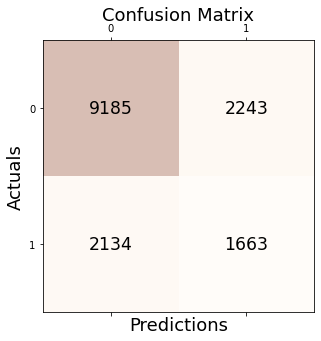

True Positives: 1663
True Negatives: 9185
False Positives: 2243
False Negatives: 2134
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.44
Specificity: 0.8
Precision: 0.8
f_1 Score: 0.57


In [42]:
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
dt_model = tree.DecisionTreeClassifier()
dt_model = dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
# print('Precision: %.3f' % precision_score(y_test, y_pred))
# print('Recall: %.3f' % recall_score(y_test, y_pred))
# print('F1 Score: %.3f' % f1_score(y_test, y_pred))

confusion_metrics(conf_matrix)


[[10754   674]
 [ 2632  1165]]


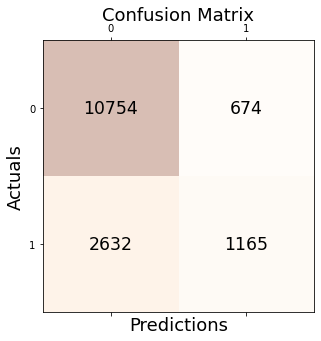

Accuracy: 0.783
Precision: 0.633
Recall: 0.307
F1 Score: 0.413
True Positives: 1165
True Negatives: 10754
False Positives: 674
False Negatives: 2632
--------------------------------------------------
Accuracy: 0.78
Mis-Classification: 0.22
Sensitivity: 0.31
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.46


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf_model = rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

confusion_metrics(conf_matrix)

[[10669   759]
 [ 3387   410]]


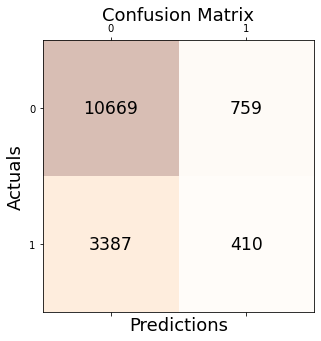

Accuracy: 0.728
Precision: 0.351
Recall: 0.108
F1 Score: 0.165
True Positives: 410
True Negatives: 10669
False Positives: 759
False Negatives: 3387
--------------------------------------------------
Accuracy: 0.73
Mis-Classification: 0.27
Sensitivity: 0.11
Specificity: 0.93
Precision: 0.93
f_1 Score: 0.19


In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh =  neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)

print(confusion_matrix(y_test, y_pred))

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

confusion_metrics(conf_matrix)

[[11273   155]
 [ 3579   218]]


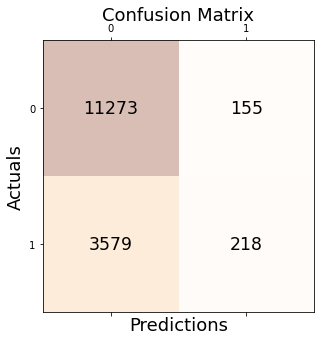

Accuracy: 0.755
Precision: 0.584
Recall: 0.057
F1 Score: 0.105
True Positives: 218
True Negatives: 11273
False Positives: 155
False Negatives: 3579
--------------------------------------------------
Accuracy: 0.75
Mis-Classification: 0.25
Sensitivity: 0.06
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.11


In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

confusion_metrics(conf_matrix)